# Feature Engineering

Feature Engineering is three-folds:

1. **Creation**: Developing new features by combining existing ones or fetching related information. This can help identify patterns or relationships that raw data might not reveal.
    1. Combining: `df['AB_ratio'] = df['A'] / df['B']`
    1. Enrichment: from Databases and APIs

2. **Transformation**: Reformat or scale values of existing features. This can make the data more interpretable for the model and improve its training process.
    1. Linear: `df['A_scaled'] = (df['A'] - mu_A) / sigma_A`
    2. Normalization (non-linear): `df['price_normalized'] = log(df['price'])`
    3. Binning: `df['age_bin'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '30-45', '45-60', '60+'])`
    4. Encoding (one-hot): `df = pd.get_dummies(df, columns=['color'])`

3. **Selection**: Choosing relevant features from your data. Feature importance is relative to what you are modeling. Some features might even be misleading.
    - `df = df[['A', 'C']]`
    - See here for more about [Feature Selection methods](https://amueller.github.io/aml/05-advanced-topics/12-feature-selection.html).

### Examples of Feature Creation

- **Age** dervied from `date_of_birth` subtracted from the date at which the datapoint were collected
- **Fitness**: (BMI) calculated from height and weight, better than either of them individually
- **Productivity**: Number of publications over number of years, might be more helpful than publication count or years in company individually

In [ ]:
import pandas as pd

## Feature Creation: `density`

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


## Feature Creation: `BMI`

In [ ]:
import pandas as pd

humans = pd.read_csv('../datasets/nba/SOCR-HeightWeight.csv')
humans.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


#### Feature Transformation

- Inches to Meters
- Pounds to Kilograms

In [ ]:
# convert height and weight to scientific units
humans['Height'] = humans['Height(Inches)'] * 0.0254
humans['Weight'] = humans['Weight(Pounds)'] * 0.453592

In [ ]:
humans['BMI'] = humans['Weight'] / (humans['Height'] ** 2)

In [ ]:
humans.head()

,Index,Height(Inches),Weight(Pounds),Height,Weight,BMI
0,1,65.78331,112.9925,1.670896,51.252494,18.357609
1,2,71.51521,136.4873,1.816486,61.909547,18.762615
2,3,69.39874,153.0269,1.762728,69.411778,22.338940
3,4,68.21660,142.3354,1.732702,64.562199,21.504569
4,5,67.78781,144.2971,1.721810,65.452010,22.077625


In [ ]:
humans.drop(['Height(Inches)', 'Weight(Pounds)'], axis=1, inplace=True)

<Axes: ylabel='Frequency'>

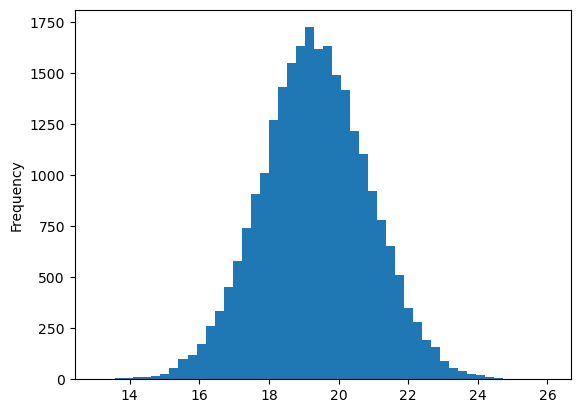

In [ ]:
humans['BMI'].plot.hist(bins=50)

#### Transformation (Binning): `Fitness`

In [ ]:
def fitness(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'healthy'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

humans['Fitness'] = humans['BMI'].apply(fitness).astype('category')

<Axes: xlabel='Fitness'>

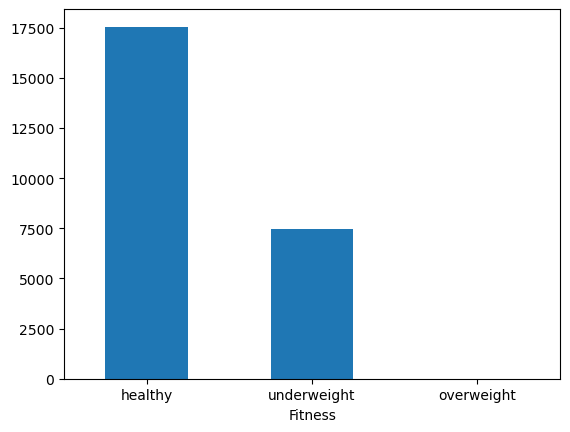

In [ ]:
# Plot humans distribution across fitness class
humans['Fitness'].value_counts().plot(kind='bar', rot=0)

### Gradient color based on continuous variable `BMI`

<Axes: xlabel='Height', ylabel='Weight'>

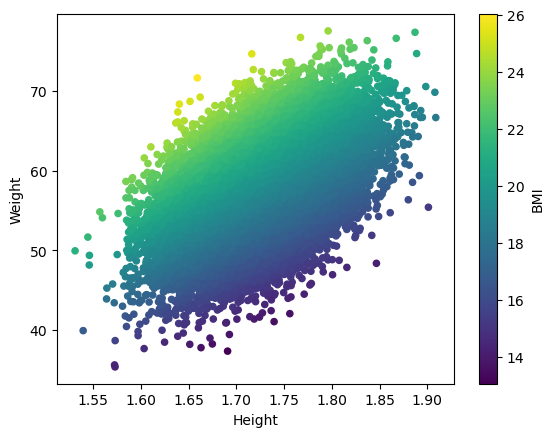

In [ ]:
humans.plot.scatter(x='Height', y='Weight', c='BMI', colormap='viridis', alpha=0.2)

### Discrete label color based on categorical variable `Fitness`

<Axes: xlabel='Height', ylabel='Weight'>

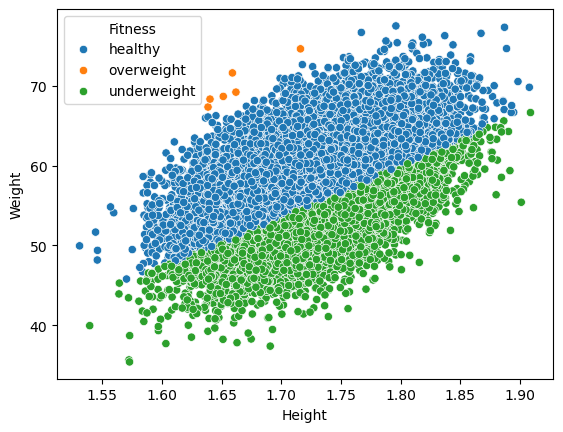

In [ ]:
import seaborn as sns

sns.scatterplot(x='Height', y='Weight', hue='Fitness', data=humans, alpha=0.2)

## Enrichment: You are not limited to the dataset

You are not limited to the dataset given to you.

*Example*: let's say the data have number of hotels and the country. And we want to create a feature to represent how **Touristy** a country is. The number of hotels alone isn't a good indicator, when comparing two countries of different size or populations. Hence, we first fetch population of the country from an API, add it to our dataset, and create our new feature.

#### Remember

Data Wrangling, Exploration, and Feature Engineering are iterative. Meaning, that you may want to explore engineered features after the exploration phase on the initial data.